# O-notation

O-notation describes how the running time of an algorithm is realted to the size of its input.

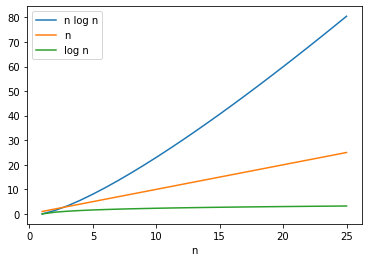

In [1]:
from matplotlib import pyplot
from numpy import arange, log

n = arange(1, 26)

# pyplot.plot(n, n**2, label = "n^2")
pyplot.plot(n, n*log(n), label = "n log n")
pyplot.plot(n, n, label = "n")
pyplot.plot(n, log(n), label = "log n")

pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

In [2]:
# This function returns the average of the values in an array.
# The algorithm is O(n) where n = len(array).
def average(array):
    total = 0
    for i in range(len(array)):
        total += i
    return total/len(array)

Using built-in operations we can make these functions simpler.

In [3]:
# This is a simpler version of the average function
# The algorithm is still O(n) where n = len(array)
def simple_average(array):
    return (sum(array)/len(array))

In [4]:
# This function returns the difference between the largest and smallest values in an array
# The algorithm is O(n) where n = len(array).
def difference(array):
    min = array[0]
    max = array[0]
    for i in array:
        if i < min:
            min = i
        elif i > max:
            max = i
    return max - min

In [5]:
# This is a simpler version of the difference function.
# The algorithm is O(n) where n = len(array).
def simple_difference(array):
    return max(array) - min(array)

In [6]:
# This functions returns whether an array contains all unique values (no duplicates).
# The algorithm is O(n^2) where n - len(array)
def unique(array):
    for i in range(len(array)):
        for j in range(len(array)):
            if i != j and array[i] == array[j]:
                return False
    return True

In [7]:
# This is a simpler version of the unique function
# The algorithm is O(n^2) where n = len(array)
def simple_unique(array):
    for i in range(0, len(array)):
        if array[i] in array[i+1:]:
            return False
    return True

In [8]:
# This is a  better version of the unique function.
# The algorithm is O(n^2) where n - len(array)
def better_unique(array):
    for i in range(len(array)):
        for j in range(i+1, len(array)):
            if array[i] == array[j]:
                return False
    return True

Let's compare the running times of these functions.

In [9]:
# This function times an array function on a range of problem sizes.
def timer(f, lengths):
    times=[]
    for n in lengths:
        array = list(range(n))
        time = %timeit -n1 -r1 -o -q f(array)
        times.append(time.average)
    return times

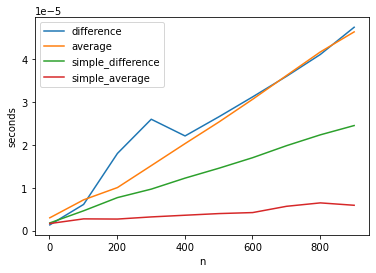

In [10]:
# This code plots some times for our average and difference functions
from matplotlib import pyplot
from numpy import arange, log

n = arange(1, 1000, 100)

# pyplot.plot(n, timer(unique, n), label = "unique")
pyplot.plot(n, timer(difference, n), label = "difference")
pyplot.plot(n, timer(average, n), label = "average")
pyplot.plot(n, timer(simple_difference, n), label = "simple_difference")
pyplot.plot(n, timer(simple_average, n), label = "simple_average")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

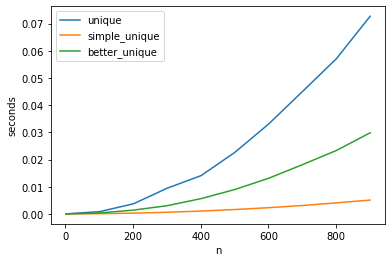

In [11]:
# This code plots some times for our unique functions
from matplotlib import pyplot
from numpy import arange, log

n = arange(1, 1000, 100)

pyplot.plot(n, timer(unique, n), label = "unique")
pyplot.plot(n, timer(simple_unique, n), label = "simple_unique")
pyplot.plot(n, timer(better_unique, n), label = "better_unique")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

Built-in operations often have internal loops, so they aren't constant time, but they are optimized to have smaller constant multipliers than our own loops.